# Part 6 of 2D Data Tracks: Text Labels---Basic

This page is primarily based on the following page at the Circos documentation site:



- [6. Text Labels---Basic](????????????)



That page is found as part number 4 of the ??? part ['2D Data Tracks' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 5 by clicking [here &#8592;](2d_data_tracks_Part5.ipynb).



----



6 --- 2D Data Tracks
====================

6. Text Labels---Basic
----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/2d_tracks/text_1/lesson){.clean}]{.active}
[Images](/documentation/tutorials/2d_tracks/text_1/images){.normal}
[Configuration](/documentation/tutorials/2d_tracks/text_1/configuration){.normal}
:::

The text label track associates a text string with a genomic span. The
text is placed radially and, as for scatter plots, positioned with its
center line at the middle of the span.

### data format

Format of labels data files is analogous to other 2D data tracks

```ini
...
hs1 225817866 225910748 ZNF678
hs1 26560711 26571853 ZNF683
hs1 40769819 40786426 ZNF684 color=red
hs1 149521414 149531004 ZNF687
...
```


The fourth field is the text label, with optional format parameters
specific to the label defined in the last field.

### basic text track

The basic text track definition is shown below,

```ini
<plots>
```


```ini
<plot>
type             = text
color            = black
file             = data/6/text.genes.znf.txt
```


```ini
r0 = 0.4r
r1 = 0.8r
```


```ini
show_links     = yes
link_dims      = 4p,4p,8p,4p,4p
link_thickness = 2p
link_color     = red
```


```ini
label_size   = 24p
label_font   = condensed
```


```ini
padding  = 0p
rpadding = 0p
```


```ini
</plot>
```


```ini
</plots>
```


#### default track values

Like all tracks, text tracks have default parameter values defined in
`etc/tracks/text.conf`{.syn-include}.

```ini
label_font     = default
label_size     = 12
color          = black
```


```ini
r0             = 0.85r
r1             = 0.95r
```


```ini
show_links     = no
link_dims      = 2p,4p,8p,4p,2p
link_thickness = 1p
link_color     = red
```


```ini
padding        = 0p
rpadding       = 0p
```


```ini
label_snuggle             = no
max_snuggle_distance      = 1r
snuggle_sampling          = 1
snuggle_tolerance         = 0.25r
```


```ini
snuggle_refine                 = no
snuggle_link_overlap_test      = no
snuggle_link_overlap_tolerance = 2p
```


Some of these correspond to features covered in other text tutorials.

To undefine a default value set the corresponding parameter to `undef`.
Undefining values makes sense for other tracks, but you shouldn\'t have
to do this with text.

```ini
# undefine color, if you must
color = undef
```


To turn off all defaults altogether, undefine `track_defaults`

```ini
<<include etc/housekeeping.conf>>
track_defaults* = undef
```


or to remove defaults just for text tracks you can remove (or move) the
file that contains the defaults.

#### label boundaries and missing labels

Labels are confined in the annulus of inner radius `r0` and outer radius
`r1`. If a label cannot be fit within this annulus, it is not drawn.

This will happen if you have a very narrow track definition and large
labels.

```ini
r0         = 1.05r
r1         = 1.1r
label_size = 100p
```


To check whether labels are being placed, run Circos with
`-debug_group textplace`. Lines that show `not_placed` indicates that
labels did not fit.

```ini
> circos ... -debug_group textplace
...
debuggroup textplace 2.06s not_placed hs1 10000 20000 gene1
debuggroup textplace 2.06s not_placed hs1 30000 40000 gene2
...
```


To make labels fit, the easiest thing to do is make `r1` larger. Here\'s
where a combination of both relative and absolute position is useful.

```ini
r0         = 1.05r
r1         = 1.05r+300p 
label_size = 100p
```


### tiling labels

Labels are drawn so that they do not overlap. If a label\'s position
results in overlap with another label, the label is drawn at the same
angular position but is radially shifted out. If snuggling is turned on,
the label\'s radial position may be slightly adjusted to reduce the
number of layers of text. This is [covered in the next
tutorial](/documentation/tutorials/2d_tracks/text_2).

#### label callout lines

The `link_dims` parameter specifies the dimensions of the lines that
link the label to its genomic position. Because labels may be shifted
(snuggling, covered in next tutorial), these link lines are necessary.
Each link line has five dimensions: outer padding, outer line length
(drawn at new position), connecting line length (connects old to new
position), inner line length (drawn at old position) and inner padding.
If snuggling is not used, then distinction between line lengths is not
made.

### text orientation

At the moment, labels can only be oriented outwards --- their link lines
point into the circle and the labels are left-aligned at the track
radius.

### text rotation

You can choose to not rotate the labels by setting `label_rotate=no` (by
default, the labels will be rotated to have their baseline oriented
radially). The non-rotated option works best when labels are very short
(e.g. one character).

```ini
<plot>
...
label_rotate = no
</plot>
```


### labels on tick scale

By setting the label radius to `r0 = 1r`, labels are drawn at the
position of ticks. Remember that a relative radius of `1r` is at the
outer ideogram radius.

```ini
<plot>
...
r0 = 1r
r1 = 1r+200p
show_links     = yes
link_dims      = 0p,0,50p,0p,10p
link_thickness = 2p
link_color     = red
</plot>
```


You need to adjust the `link_dims` so that the link line is long enough
to move the label out of the region of the ticks. Circos does not check
overlap between elements in the label track and scale ticks.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/6/6/

/home/jovyan/circos-tutorials-0.67/tutorials/6/6


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.31s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.31s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/6/6
debuggroup summary 0.31s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.31s loading configuration from file circos.conf
debuggroup summary 0.31s found conf file circos.conf
debuggroup summary 0.49s debug will appear for these features: output,summary
debuggroup summary 0.49s bitmap output image ./circos.png
debuggroup summary 0.49s SVG output image ./circos.svg
debuggroup summary 0.49s parsing karyotype and organizing ideograms
debuggroup summary 0.59s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.59s applying global and local scaling
debuggroup summary 0.59s allocating image, colors and brushes
debuggroup summary 2.43s drawing 1 ideograms of total size 249,250,622
debuggroup summary 2.43s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 1960.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

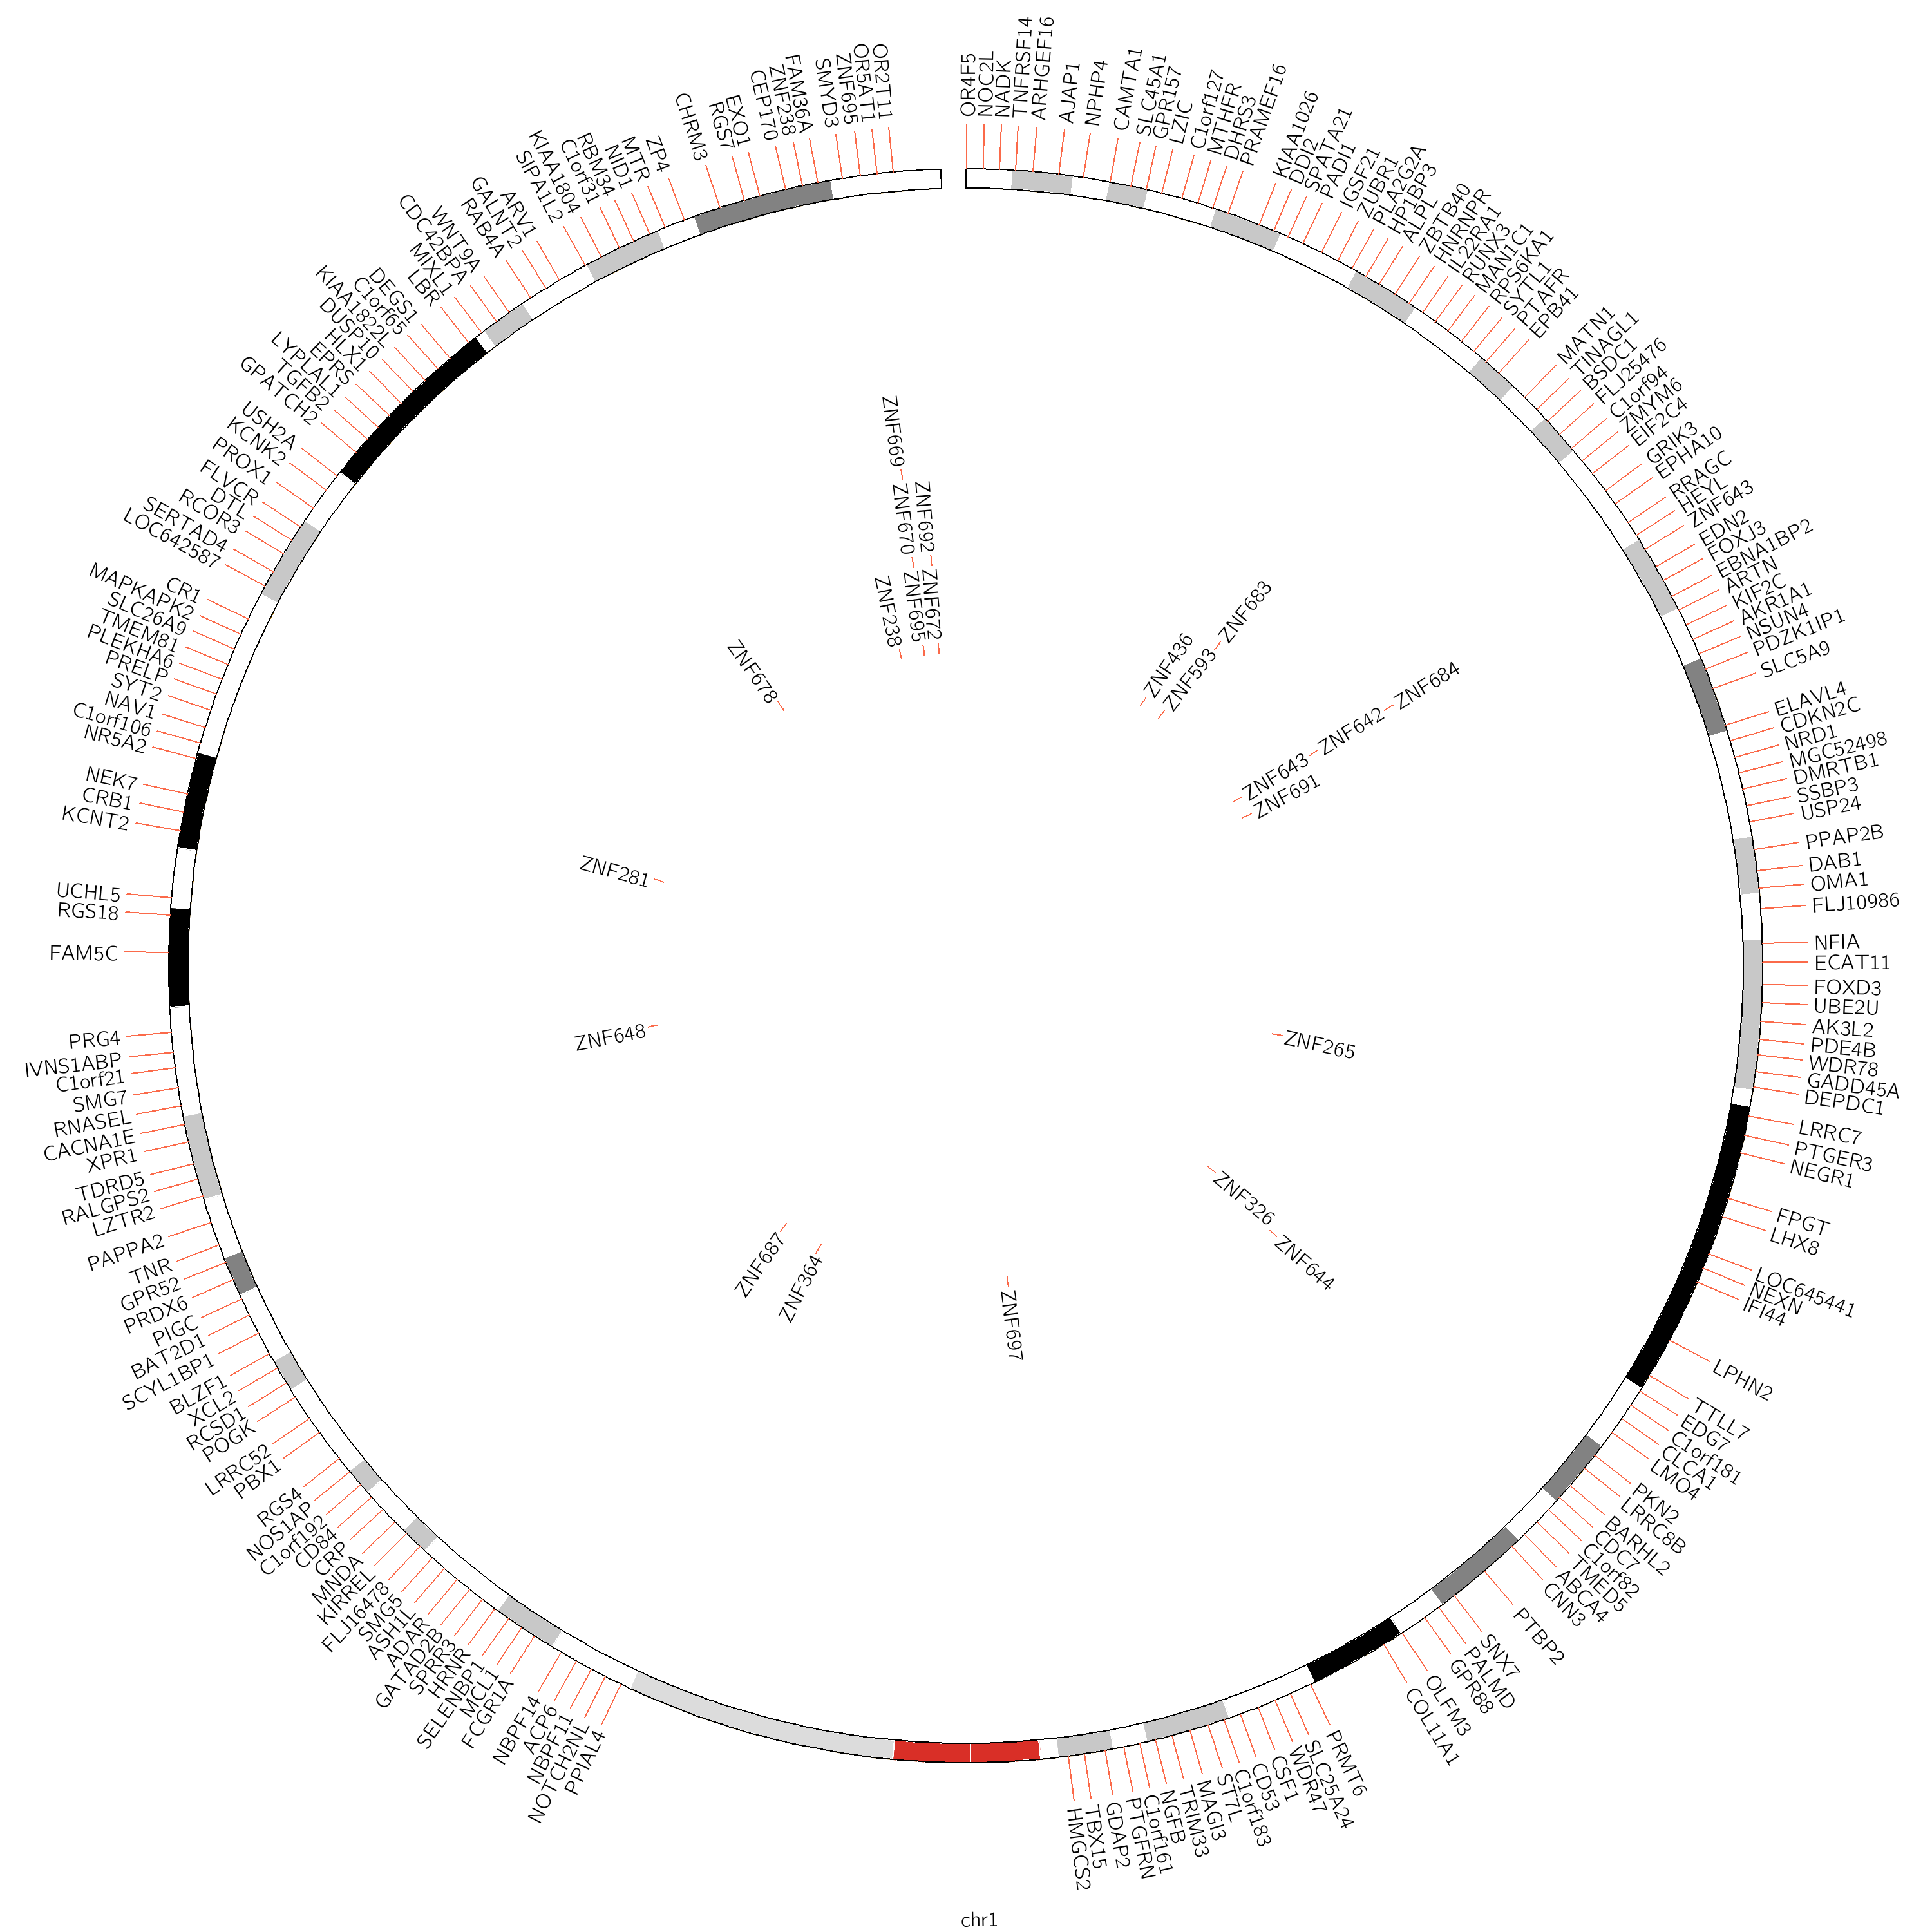

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the 2D Data Tracks series by clicking [here &#10145;](2d_data_tracks_Part7.ipynb).

----